In [1]:
from IPython.display import display, Latex, Markdown

from sympy import *
init_printing()

from pylab import *
from mpl_toolkits.mplot3d import Axes3D


In [2]:
x, y, h1, h2, C = symbols(r'x, y, h1, h2, C', real=True)
u = symbols('u', cls=Function)(x, y)

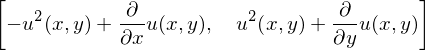

In [3]:
PDE = [u.diff(x) - u**2, u.diff(y) + u**2]
PDE

In [4]:
(PDE[0].diff(y) - PDE[1].diff(x)).subs({u.diff(x): u**2, u.diff(y): -u**2})

In [5]:
PDE[0].subs({u: 1/(-x + y + C)}).doit()

In [6]:
PDE[1].subs({u: 1/(-x + y + C)}).doit()

0.1


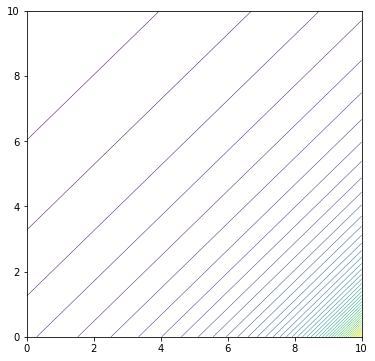

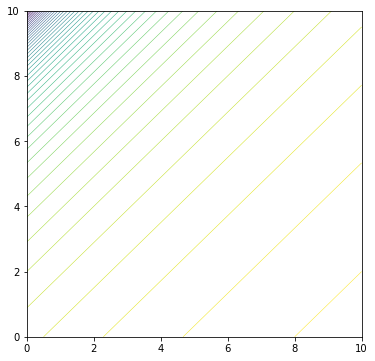

In [7]:
def ex(x, y, C):
    return 1./(-x + y + C)

N, C = 101, 12.
x, y = meshgrid(linspace(0., 10., num=N, dtype=float64),\
                linspace(0., 10., num=N, dtype=float64), indexing='ij')
h = x[1][0] - x[0][0]
print(h)

levels1 = arange(ex(x[0, -1], y[0, -1], C), ex(x[-1, 0], y[-1, 0], C), 0.01)
fig = figure(figsize=(6, 6))
contour(x, y, ex(x, y, C), levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

levels2 = arange(ex(x[0, -1], y[0, -1], -C), ex(x[-1, 0], y[-1, 0], -C), 0.01)
fig = figure(figsize=(6, 6))
contour(x, y, ex(x, y, -C), levels2, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

In [8]:
def u(j, k):
    j = 'j' if j == 0 else 'j+%d' % j
    k = 'k' if k == 0 else 'k+%d' % k
    return symbols(r'u_{%s\,%s}' % (j, k))
def T(a, j, k):
    if a.args:
        return a.func(*(T(s, j, k) for s in a.args))
    else:
        s = str(a)
        if len(s) < 4 or s[:4] != 'u_{j':
            return a
        else:
            p = s.find(',k', 4)
            j1 = 0 if not s[4:p] else int(s[4:p]) 
            k1 = 0 if not s[p+2:-1] else int(s[p+2:-1])
            return u(j1 + j, k1 + k)

# difference scheme 1 (7.2) #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+1\,k}-u_{j\,k}}{h_1} - u_{j\,k}^2 = 0 , \\
\dfrac{u_{j\,k+1}-u_{j\,k}}{h_2} + u_{j\,k}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [9]:
eq1 = expand(u(1, 0) - u(0, 0) - h1*u(0, 0)**2)
eq1

In [10]:
eq2 = expand(u(0, 1) - u(0, 0) + h2*u(0, 0)**2)
eq2

In [11]:
sp = expand(T(eq1, 0, 1) - T(eq2, 1, 0))
sp

In [12]:
res = expand(sp.subs({\
    u(1, 0): u(0, 0) + h1*u(0, 0)**2,\
    u(0, 1): u(0, 0) - h2*u(0, 0)**2,\
}))
res.factor()

In [13]:
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0] = solXY[j-1, 0] + h*solXY[j-1, 0]**2
for k in range(1, N):
    solXY[:, k] = solXY[:, k-1] - h*solXY[:, k-1]**2

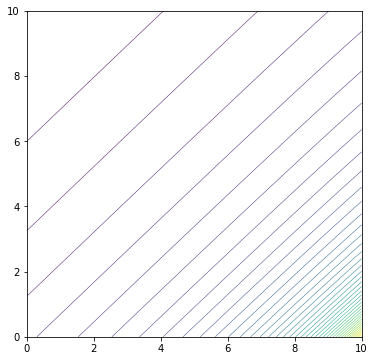

In [14]:
fig = figure(figsize=(6, 6))
contour(x, y, solXY, levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

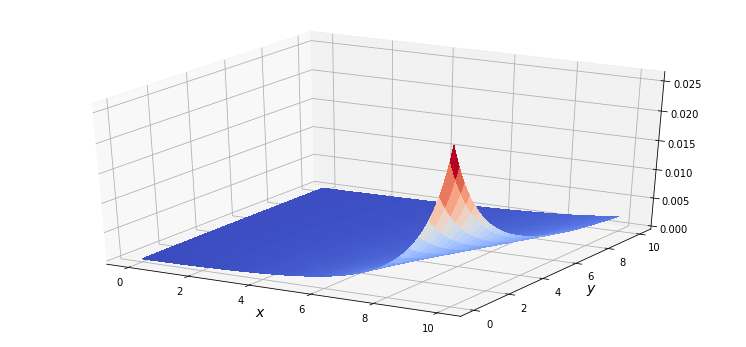

error = 0.026004666026664364


In [15]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))).flat))

In [16]:
solYX = empty_like(x)
solYX[0, 0] = ex(0., 0., -C)
for k in range(1, N):
    solYX[0, k] = solYX[0, k-1] - h*solYX[0, k-1]**2
for j in range(1, N):
    solYX[j, :] = solYX[j-1, :] + h*solYX[j-1, :]**2

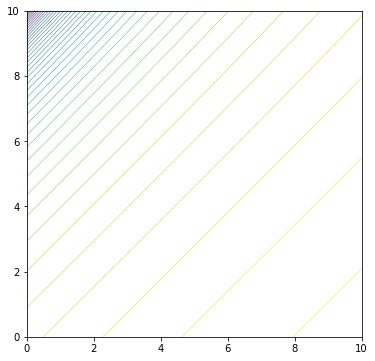

In [17]:
fig = figure(figsize=(6, 6))
contour(x, y, solYX, levels2, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

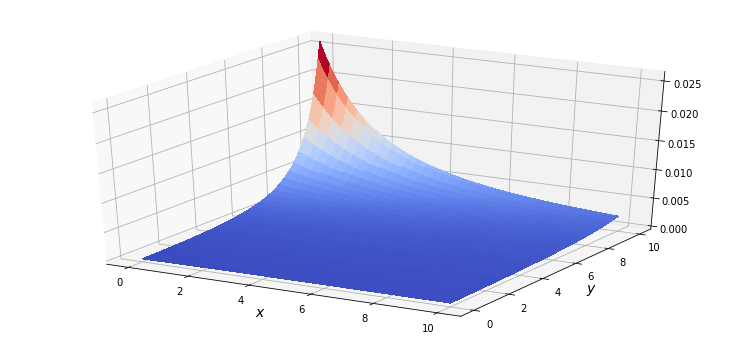

error = 0.026004666026664364


In [18]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C)))).flat))

# difference scheme 2 (7.4) #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+2\,k}-u_{j\,k}}{2h_1} - u_{j+1\,k}^2 = 0 , \\
\dfrac{u_{j\,k+2}-u_{j\,k}}{2h_2} + u_{j\,k+1}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [19]:
eq1 = u(2, 0) - u(0, 0) - 2*h1*u(1, 0)**2
eq1

In [20]:
eq2 = u(0, 2) - u(0, 0) + 2*h2*u(0, 1)**2
eq2

In [21]:
sp = expand(T(eq1, 0, 2) - T(eq2, 2, 0))
sp

In [22]:
res = expand(sp.subs({\
    u(2, 0): u(0, 0) + 2*h1*u(1, 0)**2,\
    u(0, 2): u(0, 0) - 2*h2*u(0, 1)**2,\
    u(2, 1): u(0, 1) + 2*h1*u(1, 1)**2,\
    u(1, 2): u(1, 0) - 2*h2*u(1, 1)**2,\
}))
res.factor()

In [23]:
res.subs({h2: h1}).factor()

In [24]:
solXY = empty_like(x)
solXY[:2, :] = ex(x[:2, :], y[:2, :], C)
for j in range(2, N):
    solXY[j, :] = solXY[j-2, :] + 2*h*solXY[j-1, :]**2

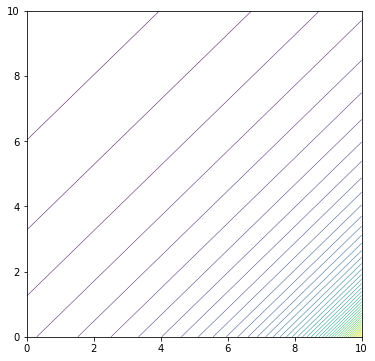

In [25]:
fig = figure(figsize=(6, 6))
contour(x, y, solXY, levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

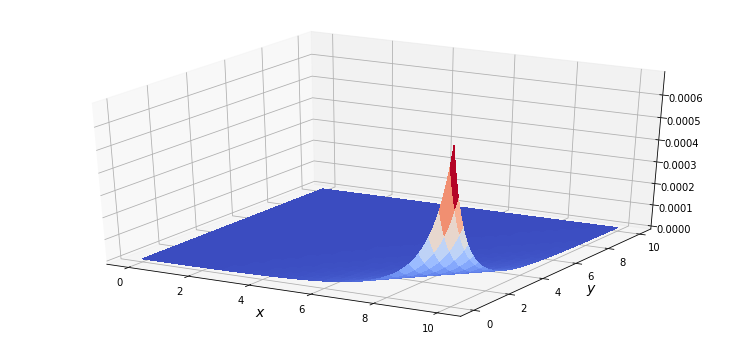

error = 0.0006879995379548051


In [26]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))).flat))

In [27]:
# PDA
solXY = empty_like(x)
solXY[:2, :] = ex(x[:2, :], y[:2, :], C)
for j in range(2, N):
    solXY[j, :] = solXY[j-2, :] + 2*h*solXY[j-1, :]**2 + 2*h**3*solXY[j-1, :]**4

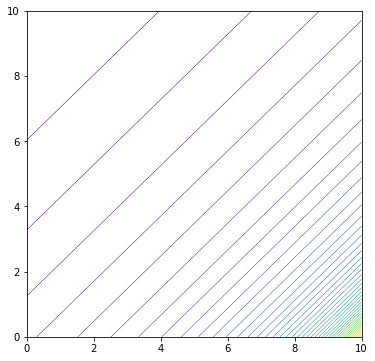

In [28]:
fig = figure(figsize=(6, 6))
contour(x, y, solXY, levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

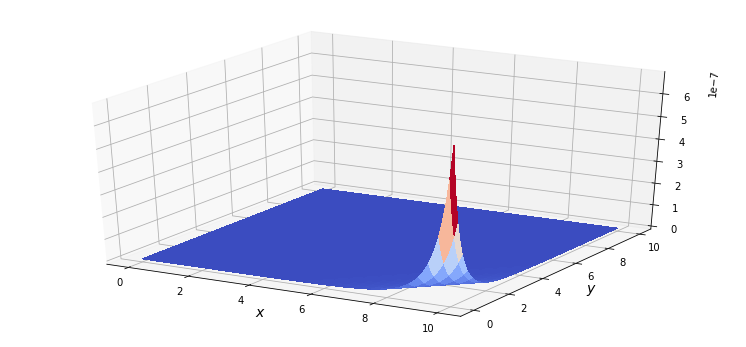

error = 6.816622843963671e-07


In [29]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))).flat))

In [30]:
solYX = empty_like(x)
solYX[:, :2] = ex(x[:, :2], y[:, :2], -C)
for k in range(2, N):
    solYX[:, k] = solYX[:, k-2] - 2*h*solYX[:, k-1]**2

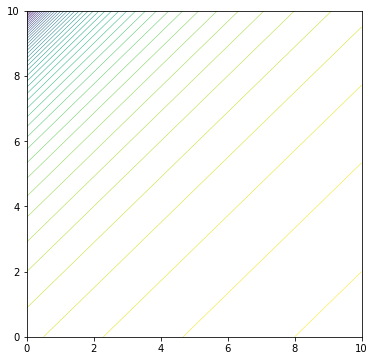

In [31]:
fig = figure(figsize=(6, 6))
contour(x, y, solYX, levels2, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

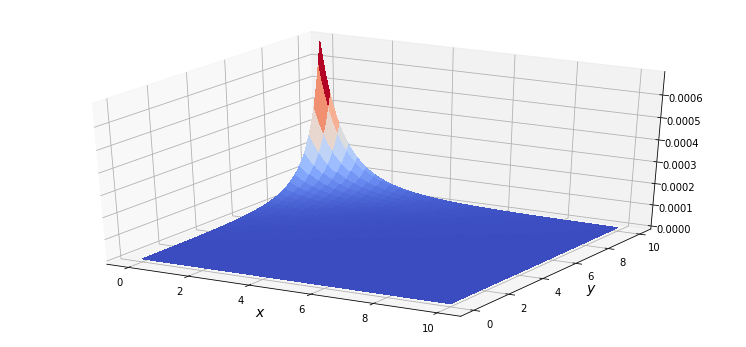

error = 0.0006879995379548051


In [32]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C)))).flat))

In [33]:
# PDA
solYX = empty_like(x)
solYX[:, :2] = ex(x[:, :2], y[:, :2], -C)
for k in range(2, N):
    solYX[:, k] = solYX[:, k-2] - 2*h*solYX[:, k-1]**2 - 2*h**3*solYX[:, k-1]**4

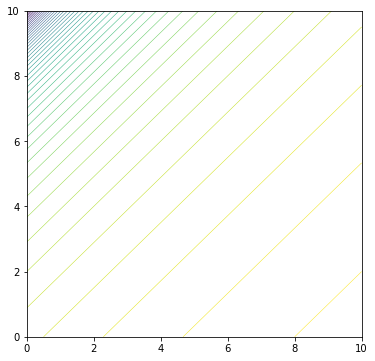

In [34]:
fig = figure(figsize=(6, 6))
contour(x, y, solYX, levels2, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

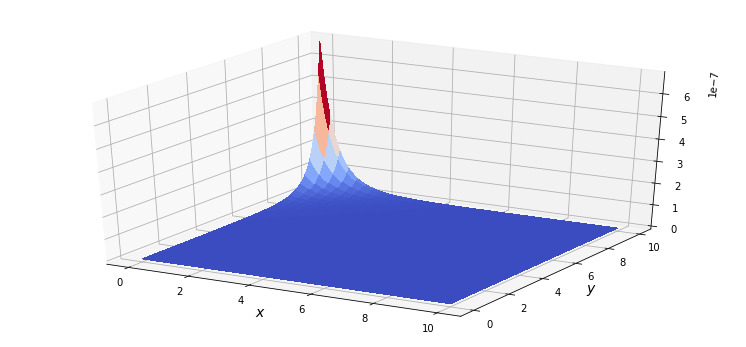

error = 6.816622843963671e-07


In [35]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C)))).flat))

# difference scheme 3 #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+1\,k}-u_{j\,k}}{h_1} - u_{j+1\,k}^2 = 0 , \\
\dfrac{u_{j\,k+1}-u_{j\,k}}{h_2} + u_{j\,k}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [36]:
eq1 = expand(u(1, 0) - u(0, 0) - h1*u(1, 0)**2)
eq1

In [37]:
eq2 = expand(u(0, 1) - u(0, 0) + h2*u(0, 0)**2)
eq2

In [38]:
sp = expand(T(eq1, 0, 1) + h1*T(eq2, 1, 0)*u(1, 1))
sp

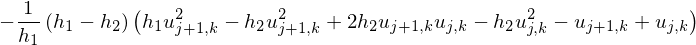

In [39]:
res = expand(sp.subs({\
    u(1, 0)**2: (u(1, 0) - u(0, 0))/h1,\
    u(0, 1): u(0, 0) - h2*u(0, 0)**2,\
    u(1, 1): u(1, 0) - h2*(u(1, 0) - u(0, 0))/h1,\
}))
res.factor()

In [40]:
res.subs({h2: h1}).factor()

\begin{equation}
\begin{aligned}
  v^2_{k+1} &= v^2_{k+1} - v^2_{k} + v^2_{k} = (v_{k+1} - v_{k})(v_{k+1} + v_{k}) + v^2_{k}
\approx v_{k+1}\cdot 2v_{k} - v_{k}^2 , \\
\end{aligned}
\end{equation}
\begin{equation}
u_i - u_{i-1} - u_i^2 h = 0 \quad \Rightarrow \quad u_i - u_{i-1} - u_i \cdot 2v_i h + v_i^2 h = 0
\quad \Rightarrow \quad u_i = \dfrac{u_{i-1} - v_i^2 h}{1 - 2v_i h}
\end{equation}

In [41]:
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0], f = solXY[j-1, 0], True
    while f:
        v = (solXY[j-1, 0] - solXY[j, 0]**2*h)/(1. - 2*solXY[j, 0]*h)
        f = norm(solXY[j, 0] - v) >= 1.e-12
        solXY[j, 0] = v
for k in range(1, N):
    solXY[:, k] = solXY[:, k-1] - h*solXY[:, k-1]**2

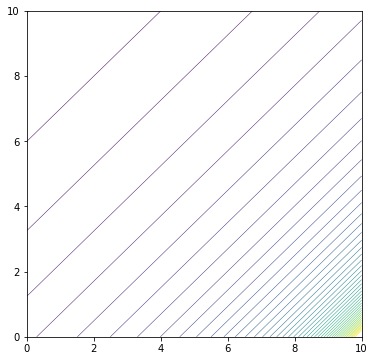

In [42]:
fig = figure(figsize=(6, 6))
contour(x, y, solXY, levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

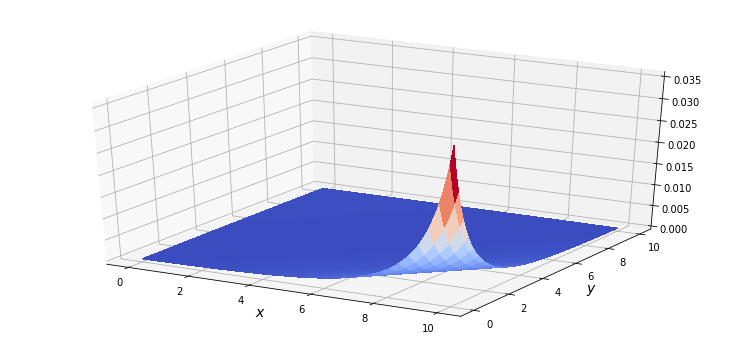

error = 0.03533846112050839


In [43]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))).flat))

\begin{equation}
v^3_{k+1} = v^3_{k+1} - v^3_{k} + v^3_{k} = (v_{k+1} - v_{k})(v_{k+1}^2 +v_{k+1}v_{k} + v_{k}^2) + v^3_{k}
\approx v_{k+1}\cdot 3v_{k}^2 - 2v_{k}^3
\end{equation}

\begin{equation}
u_i - u_{i-1} - u_i^2 h - u_i^3 h^2 = 0 \quad \Rightarrow \quad u_i - u_{i-1} 
- u_i \cdot 2v_i h + v_i^2 h 
- u_i \cdot 3v_i^2 h^2 + 2v_i^3 h^2 
= 0
\quad \Rightarrow \quad u_i = \dfrac{u_{i-1} - v_i^2 h - 2v_i^3 h^2}{1 - 2v_i h - 3v_i^2 h^2}
\end{equation}

In [44]:
# PDA
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0], f = solXY[j-1, 0], True
    while f:
        v = (solXY[j-1, 0] - solXY[j, 0]**2*h + 2*solXY[j, 0]**3*h**2)/\
        (1. - 2*solXY[j, 0]*h + 3*solXY[j, 0]**2*h**2)
#         v = (solXY[j-1, 0] - solXY[j, 0]**2*h)/(1. - 2*solXY[j, 0]*h)        
        f = norm(solXY[j, 0] - v) >= 1.e-12
        solXY[j, 0] = v
for k in range(1, N):
    solXY[:, k] = solXY[:, k-1] - h*solXY[:, k-1]**2 - h**2*solXY[:, k-1]**3

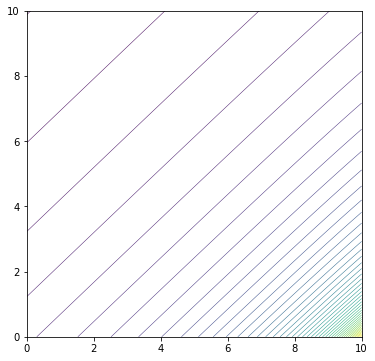

In [45]:
fig = figure(figsize=(6, 6))
contour(x, y, solXY, levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

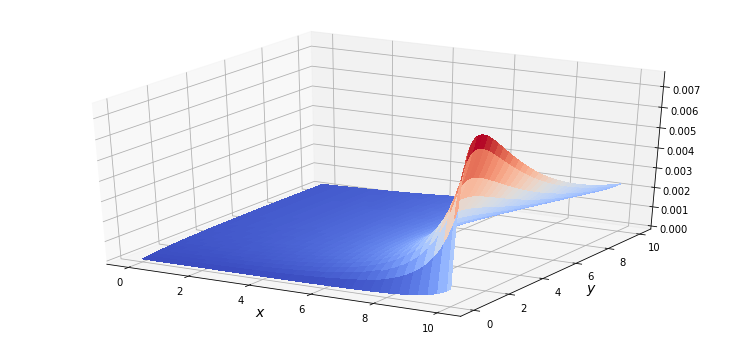

error = 0.007565390632478536


In [46]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))).flat))

In [47]:
solYX = empty_like(x)
solYX[0, 0] = ex(0., 0., -C)
for k in range(1, N):
    solYX[0, k] = solYX[0, k-1] - h*solYX[0, k-1]**2
for j in range(1, N):
    solYX[j, :], f = solYX[j-1, :], True
    while f:
        v = (solYX[j-1, :] - solYX[j, :]**2*h)/(1. - 2*solYX[j, :]*h)
        f = norm(solYX[j, :] - v) >= 1.e-12
        solYX[j, :] = v

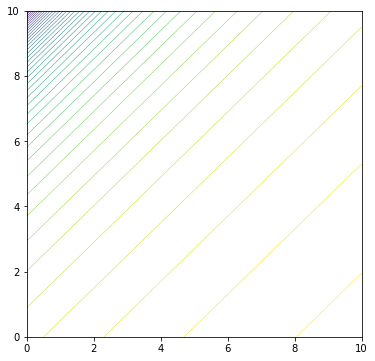

In [48]:
fig = figure(figsize=(6, 6))
contour(x, y, solYX, levels2, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

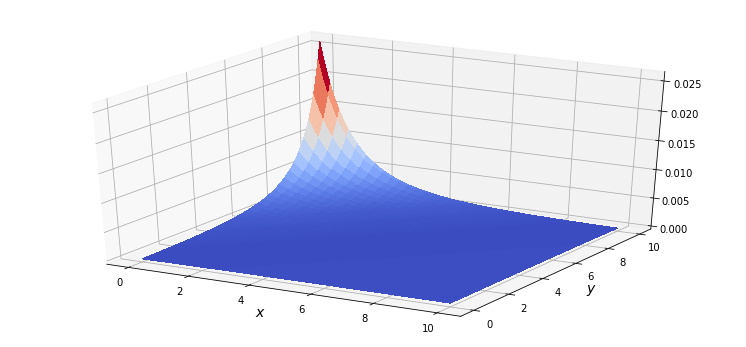

error = 0.026004666026664364


In [49]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C)))).flat))

# difference scheme 4 (7.3) #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+1\,k}-u_{j\,k}}{h_1} - u_{j\,k}^2 = 0 , \\
\dfrac{u_{j\,k+1}-u_{j\,k}}{h_2} + u_{j\,k+1}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [50]:
eq1 = expand(u(1, 0) - u(0, 0) - h1*u(0, 0)**2)
eq1

In [51]:
eq2 = expand(u(0, 1) - u(0, 0) + h2*u(0, 1)**2)
eq2

In [52]:
sp = expand(h2*T(eq1, 0, 1)*u(1, 1) - T(eq2, 1, 0))
sp

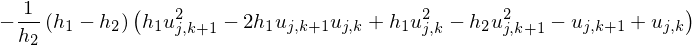

In [53]:
res = expand(sp.subs({\
    u(1, 0): u(0, 0) + h1*u(0, 0)**2,\
    u(0, 1)**2: -(u(0, 1) - u(0, 0))/h2,\
    u(1, 1): u(0, 1) - h1*(u(0, 1) - u(0, 0))/h2,\
}))
res.factor()

In [54]:
res.subs({h2: h1}).factor()

In [55]:
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0] = solXY[j-1, 0] + h*solXY[j-1, 0]**2
for k in range(1, N):
#     solXY[:, k] = solXY[:, k-1] - h*solXY[:, k-1]**2
    solXY[:, k], f = solXY[:, k-1], True
    while f:
        v = (solXY[:, k-1] + solXY[:, k]**2*h)/(1. + 2*solXY[:, k]*h)
        f = norm(solXY[:, k] - v) >= 1.e-12
        solXY[:, k] = v

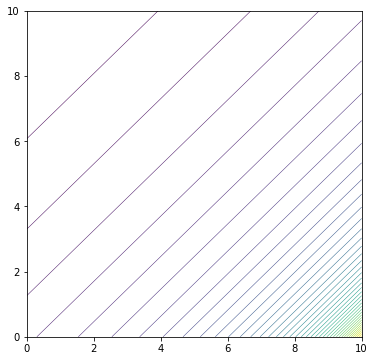

In [56]:
fig = figure(figsize=(6, 6))
contour(x, y, solXY, levels1, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

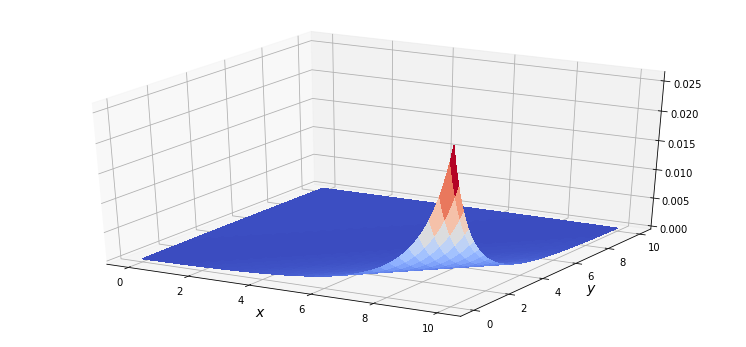

error = 0.026004666026664364


In [57]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))).flat))

In [58]:
solYX = empty_like(x)
solYX[0, 0] = ex(0., 0., -C)
for k in range(1, N):
    solYX[0, k], f = solYX[0, k-1], True
    while f:
        v = (solYX[0, k-1] + solYX[0, k]**2*h)/(1. + 2*solYX[0, k]*h)
        f = norm(solYX[0, k] - v) >= 1.e-12
        solYX[0, k] = v
for j in range(1, N):
    solYX[j, :] = solYX[j-1, :] + h*solYX[j-1, :]**2

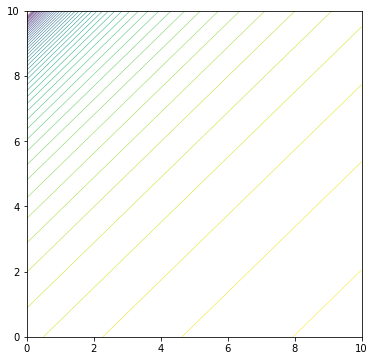

In [59]:
fig = figure(figsize=(6, 6))
contour(x, y, solYX, levels2, linewidths=0.5)
show()
# savefig('./fig1.pdf')
close()

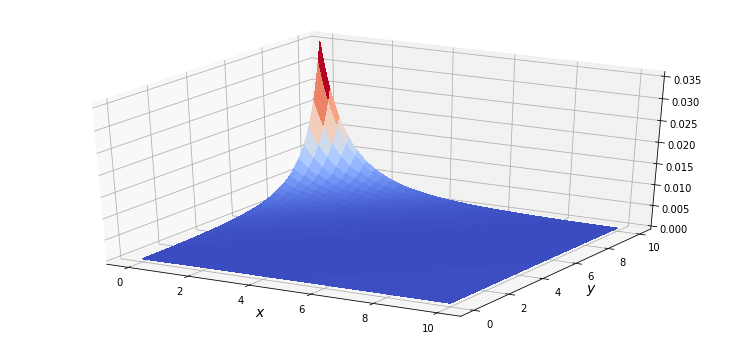

error = 0.03533846112050839


In [60]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
# ax.set_zlabel(r'$\|u-1/(-x+y+C)\|$', {'fontsize': 14})
ax.plot_surface(x, y, abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C))), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig1.pdf')
close()
print("error =", max((abs(solYX - ex(x, y, -C))/(1. + abs(ex(x, y, -C)))).flat))